# Linear Regression: Predicting and Forecasting
## Sources: 
1. <a href="https://pythonprogramming.net/forecasting-predicting-machine-learning-tutorial/" target="_blank">Python Programming: Regression - Forecasting and Predicting</a>

In the previous notebooks, we learned what linear regression is, as well as how to train and test our data.  In this notebook, we will use our trained model to predict new values and forecast out into the future.

In [1]:
# Import dependencies
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Raise errors instead of give warnings
pd.set_option("mode.chained_assignment", "raise")

In [3]:
# Import data
import os
data_file_path = os.path.join("Data","stock_data.csv")

stock_data = pd.read_csv(data_file_path, index_col="Date")
display(stock_data.head())

,Adj. Close,High_Low_Volatility_Percent,Daily_Percent_Change,Adj. Volume,Forecast
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849


In [4]:
# Define features
X = np.array(stock_data.drop(["Forecast"], 1))

# Define labels
y = np.array(stock_data["Forecast"])

In [5]:
# Define the number of days out we want to forecast
# In this case, want to forecast out 1% of the dataframe
import math
forecast_out = int(math.ceil(0.03*len(stock_data)))

# Only include values up until the row before the Forecast values become null
# or rather, exclude the last 1% of values
# Recall that when specifying a range,
# Python excludes the last value
X = X[:-forecast_out]
y = y[:-forecast_out]

In [6]:
forecast_out

103

In [7]:
# Confirm features and labels are the same length
length_of_features = len(X)
length_of_label = len(y)

print(f"Length of features: {length_of_features}")
print(f"Length of label: {length_of_label}")

Length of features: 3321
Length of label: 3321


In [8]:
# Scale features
X = preprocessing.scale(X)

In [9]:
# Define training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# Define which classification algorithm we are using
classifier = LinearRegression(fit_intercept=True)

In [11]:
# Fit- or train- the classifier
classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Print the saccuracy of the classifier
print(classifier.score(X_test, y_test))

0.9747803026844218


### Note!

Recall that we engineered the labels column—or the Forecast column—by shifting the values in the Adj. Close column up 35 values.  This would mean that the last 35 rows in the Forecast column have no value.  We will show this more clearly by looking at the last 37 rows of the dataframe.

In [13]:
# Preview last 35 columns of data
display(stock_data.tail(37))

,Adj. Close,High_Low_Volatility_Percent,Daily_Percent_Change,Adj. Volume,Forecast
Date,,,,,
2018-02-02,1119.20,1.811604,-0.729098,5798880.0,1054.09
2018-02-05,1068.76,5.512236,-2.893850,3742469.0,1006.94
2018-02-06,1084.43,5.569849,4.879205,3732527.0,NaN
2018-02-07,1055.41,3.025734,-2.724499,2544683.0,NaN
2018-02-08,1005.60,5.851043,-5.120439,3067173.0,NaN
2018-02-09,1043.43,5.488465,1.710726,4436032.0,NaN
2018-02-12,1054.56,1.920631,-0.199684,2796258.0,NaN
2018-02-13,1054.14,1.365911,0.394286,1574121.0,NaN
2018-02-14,1072.70,2.445228,1.743304,2029979.0,NaN


Consequently, we will use our linear regression model to predict these missing values.

In [14]:
# Define what we want to forecast
# Recall that X is defined as: X = X[:-forecast_out]
# We will therefore forecast out using "the rest" of the features,
# That is, X was defined as every row up to ath row,
# where a is defined as the ceiling function of 1% of the dataframe
# X_forecast then will include every row from the ath row to the last
X_forecast = X[-forecast_out:]
# X_forecast = preprocessing.scale(X_forecast)

We are now ready to forecast out into the future.  To do this, we will simply pass the X_forecast array into the .predict() method of our classifier, and we are done.

In [15]:
# Make prediction
forecast = classifier.predict(X_forecast)

# Preview forecasted values
print(forecast)

[1004.81982228 1013.1369868  1020.67349668 1012.86750035 1018.83592884
 1021.27765852  979.37430133  974.58285043  986.14133467  982.95212359
  975.26245217  974.74140963  991.88810587  985.2084275   995.49713178
  993.87649196 1002.79046751  986.46017819  962.57213204  974.94862591
  951.68583263  944.74527604  934.04696228  947.50361736  943.02680552
  956.70905854  967.56236333  970.17456176  984.03999917  984.76137758
  994.17224165  992.25045056 1002.78834909 1009.87420793 1008.36387903
 1010.65739766 1013.99582564  984.01228722  981.05349329  964.76107882
  974.08953736  960.07038595  963.17353566  962.98558472  956.60460169
  962.72305195  962.88073597  960.67547437  956.61315177  938.6569839
  946.24436494  955.96295428  955.1048676   960.87312373  942.72179785
  942.90877945  937.16972761  956.20545161  959.23234523  952.40176303
  946.68193348  944.72027724  951.26544028  960.10441069  971.79100057
  968.8140706   956.97247799  958.19073074  966.18852993  957.72331663
  959.4

In [16]:
# Preview forecasted values
print(forecast)

[1004.81982228 1013.1369868  1020.67349668 1012.86750035 1018.83592884
 1021.27765852  979.37430133  974.58285043  986.14133467  982.95212359
  975.26245217  974.74140963  991.88810587  985.2084275   995.49713178
  993.87649196 1002.79046751  986.46017819  962.57213204  974.94862591
  951.68583263  944.74527604  934.04696228  947.50361736  943.02680552
  956.70905854  967.56236333  970.17456176  984.03999917  984.76137758
  994.17224165  992.25045056 1002.78834909 1009.87420793 1008.36387903
 1010.65739766 1013.99582564  984.01228722  981.05349329  964.76107882
  974.08953736  960.07038595  963.17353566  962.98558472  956.60460169
  962.72305195  962.88073597  960.67547437  956.61315177  938.6569839
  946.24436494  955.96295428  955.1048676   960.87312373  942.72179785
  942.90877945  937.16972761  956.20545161  959.23234523  952.40176303
  946.68193348  944.72027724  951.26544028  960.10441069  971.79100057
  968.8140706   956.97247799  958.19073074  966.18852993  957.72331663
  959.4

The values printed above are the predicted values for the next $a$ days, where $a$ is 1% of the length of the dataframe.  Using Linear Regression, we have forecasted out future stock prices.  We will now visualize this forecast.

Recall that the last $a$ rows of the Forecast column in our stock_data dataframe are NaN values, where $a$ is 1% of the length of the dataframe.  We will therefore fill these values in with our forecast array.

In [17]:
# Recall that the a rows of the Forecast column in our stock_data dataframe are NaN values,
# where a is 1% of the length of the dataframe
display(stock_data.tail(forecast_out+2))

,Adj. Close,High_Low_Volatility_Percent,Daily_Percent_Change,Adj. Volume,Forecast
Date,,,,,
2017-10-24,988.49,1.246571,0.201723,1416283.0,1057.47
2017-10-25,991.46,1.708870,0.526225,1368042.0,1072.00
2017-10-26,991.42,1.619433,-0.706080,1827682.0,1085.09
2017-10-27,1033.67,3.580854,0.259944,5139945.0,1079.78
2017-10-30,1033.13,1.711776,0.385751,2245352.0,1073.56
...,...,...,...,...,...
2018-03-21,1094.00,1.976619,0.130884,1990515.0,NaN
2018-03-22,1053.15,3.265882,-2.487014,3418154.0,NaN
2018-03-23,1026.55,4.089299,-2.360729,2413517.0,NaN


In [18]:
# Fill in NaN values with forecast array
stock_data["Forecast"][-forecast_out:] = forecast

# Preview tail of dataframe,
# to confirm NaN values have been filled
display(stock_data.tail(forecast_out+2))

,Adj. Close,High_Low_Volatility_Percent,Daily_Percent_Change,Adj. Volume,Forecast
Date,,,,,
2017-10-24,988.49,1.246571,0.201723,1416283.0,1057.470000
2017-10-25,991.46,1.708870,0.526225,1368042.0,1072.000000
2017-10-26,991.42,1.619433,-0.706080,1827682.0,1004.819822
2017-10-27,1033.67,3.580854,0.259944,5139945.0,1013.136987
2017-10-30,1033.13,1.711776,0.385751,2245352.0,1020.673497
...,...,...,...,...,...
2018-03-21,1094.00,1.976619,0.130884,1990515.0,1018.615062
2018-03-22,1053.15,3.265882,-2.487014,3418154.0,1022.418785
2018-03-23,1026.55,4.089299,-2.360729,2413517.0,1000.104137


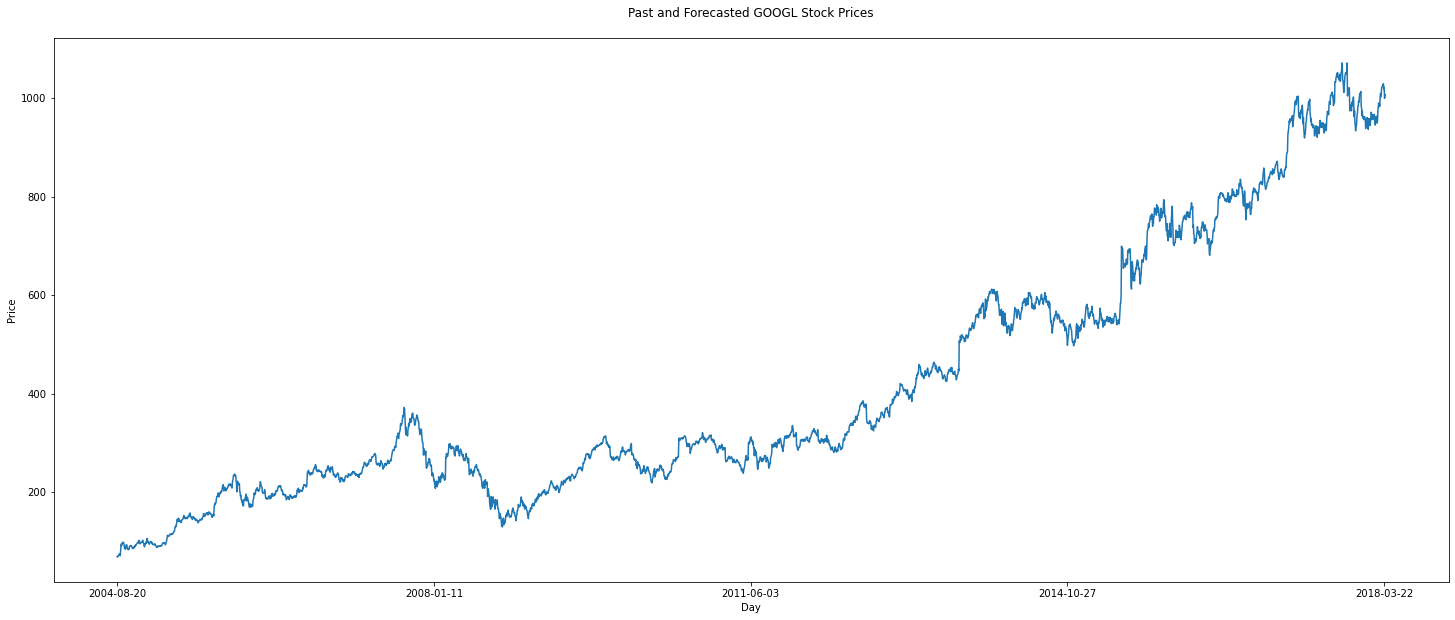

In [19]:
# import plotting library and visualize past data along with forecasted data
%matplotlib inline
import matplotlib.pyplot as plt

# Create plot figure
_ = plt.figure(figsize=(25,10))

# plot past and forecasted data
_ = plt.plot(stock_data["Forecast"])


# Add title and axis labels
_ = plt.title("Past and Forecasted GOOGL Stock Prices\n")
_ = plt.xlabel("Day")
_ = plt.ylabel("Price")

# Change number of tick marks on the x-axis for readability
plt.xticks(ticks=[1, 3420/4, 3420/2, ((3420/2)+3420)/2, 3420])

# axes = plt.axes()
# axes.set_xticks([4])

plt.show()

As can be seen in the plot above, we can view the forecasted values, but we can't tell where the past data actually stops, and where the forecasted values begin.  For situations such as this, it may be beneficial to use past data and forecasted data as separate datasets, while still plotting on the same graph.

In [20]:
# Create new dataframe,
# containing only the last a rows of the original,
# where a is 1% of the length of the dataframe
stock_data_forecast = stock_data[-forecast_out:].copy()

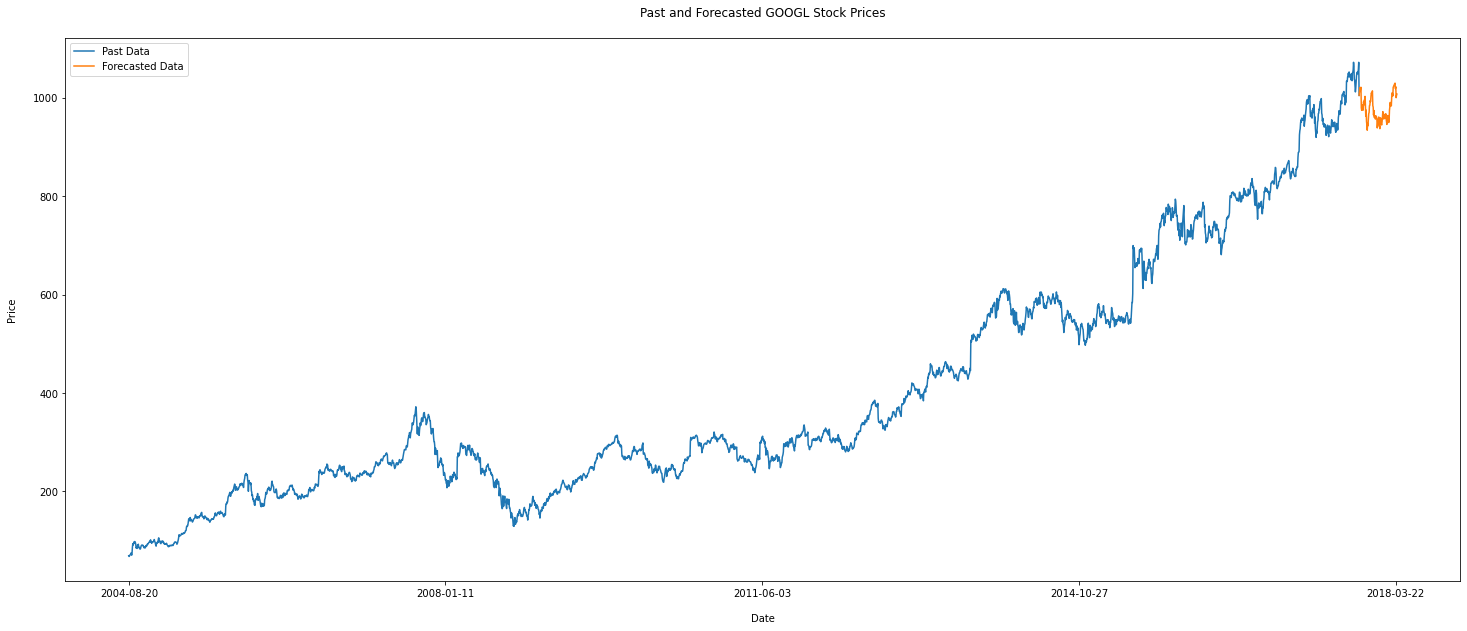

In [21]:
# Create a plot figure
figure_length = 25
figure_height = 10
plt.figure(figsize=(figure_length,figure_height))

# Plot past data and forecast data as separate data
plt.plot(stock_data["Forecast"][:-forecast_out+1],label="Past Data")
plt.plot(stock_data_forecast["Forecast"][-forecast_out:], label="Forecasted Data")

# Add title, legend, and axis labels
plt.legend()
plt.xlabel("\nDate")
plt.ylabel("Price\n")
plt.title("Past and Forecasted GOOGL Stock Prices\n")

# Change number of tick marks on the x-axis for readability
plt.xticks(ticks=[1, 3420/4, 3420/2, ((3420/2)+3420)/2, 3420])

plt.show()

### ATTENTION!

We have a unique identifier column filled with consecutive integers, which you could think of as representing which day the stock price is for.  We have not accounted for weekends, holidays, or any other day the stock market would be closed.  If this were a serious machine learning forecast, we would need to take these days into consideration.  However, the main point of this project is to learn the fundamentals of machine learning; so we will skip this consideration.  In a real-world project though, we would need to account for such considerations for an honest and accurate machine learning model.